# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

import random

## Exercises

**Exercise 7-1:** Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [2]:
import first

live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age.

In [3]:
# Solution goes here
sample = thinkstats2.SampleRows(live, 1000)

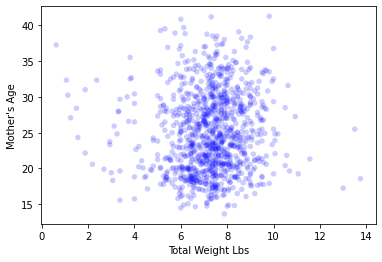

In [4]:
# Solution goes here
thinkplot.Scatter(sample.totalwgt_lb, sample.agepreg)
thinkplot.Config(xlabel = 'Total Weight Lbs', ylabel = "Mother's Age")

Plot percentiles of birth weight versus mother’s age.

In [5]:
# Solution goes here
bins = np.arange(10, 50, 3)
indices = np.digitize(live.agepreg, bins)
groups = live.groupby(indices)

In [6]:
# Solution goes here
mean_ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

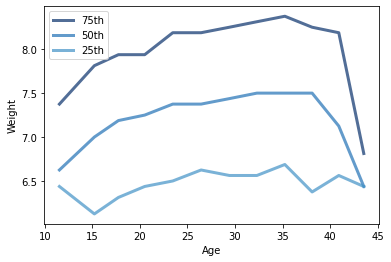

In [7]:
for percent in [75, 50, 25]:
    weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_ages, weight_percentiles, label=label)
    
thinkplot.Config(xlabel='Age',
                 ylabel='Weight')

Compute Pearson’s and Spearman’s correlations.

In [8]:
print('Pearson’s correlation: ', thinkstats2.Corr(live.agepreg, live.totalwgt_lb))
print('Spearman’s correlation: ', thinkstats2.SpearmanCorr(live.agepreg, live.totalwgt_lb))

Pearson’s correlation:  0.06883397035410908
Spearman’s correlation:  0.09461004109658226


How would you characterize the relationship between these variables?  
The scatter plot shows a weak relationship. Plotting the percentiles showed that the variables are non-linear. The Pearson’s and Spearman’s correlations are very low and close to zero which tell us that there is not other relationship between the variables other than being non-linear.

**Exercise 8-1:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

Functions from chap08ex.ipynb

In [9]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

In [10]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

In [11]:
def Estimate1(n=7, iters=100000):
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('mean error xbar', MeanError(means, mu))
    print('mean error median', MeanError(medians, mu))

In [12]:
def Estimate2(n=7, iters=100000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('rmse biased', RMSE(estimates1, sigma**2))
    print('rmse unbiased', RMSE(estimates2, sigma**2))

In [13]:
# Solution goes here    
Estimate1()

mean error xbar 0.0001764879154845304
mean error median -0.0001311365892166194


In [14]:
# Solution goes here
Estimate2()

rmse biased 0.5163230690213326
rmse unbiased 0.579491247305626


**Exercise 8-2:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



In [15]:
# Solution goes here
def SimulateSample(lam=2, n=10, iters=1000):
    """Sampling distribution of L as an estimator of exponential parameter.

    lam: parameter of an exponential distribution
    n: sample size
    iters: number of iterations
    """
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='Estimate',
                     ylabel='CDF')

    return stderr

standard error 0.8696686830001592
confidence interval (1.2836802447832243, 3.7657344668212938)


0.8696686830001592

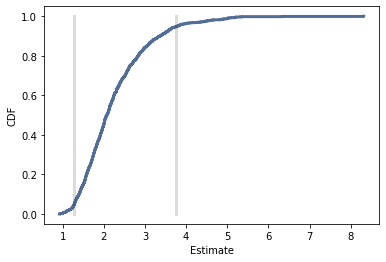

In [16]:
# Solution goes here
SimulateSample()